# Import Libraries





In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

# Machine learning models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load Dataset



In [3]:
# Load the dataset
df = pd.read_csv('/content/sorted_temp_and_rain_dataset.csv')
df



,tem,Month,Year,rain
0,16.976000,1,1901,18.535600
1,19.902600,2,1901,16.254800
2,24.315800,3,1901,70.798100
3,28.183400,4,1901,66.161600
4,27.889200,5,1901,267.215000
...,...,...,...,...
1469,28.586394,6,2023,299.915166
1470,28.533089,7,2023,353.399033
1471,28.451926,8,2023,421.058714
1472,27.737212,9,2023,306.090925


#  Data Analysis




In [4]:
# Quick look at the first few rows
print("\nFirst Five Rows of Data:")
df.head()


First Five Rows of Data:


,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [5]:
# Display last five entries of data

df.tail()

,tem,Month,Year,rain
1469,28.586394,6,2023,299.915166
1470,28.533089,7,2023,353.399033
1471,28.451926,8,2023,421.058714
1472,27.737212,9,2023,306.090925
1473,26.015523,10,2023,320.779073


In [6]:
# Display random numbers of data

df.sample(10)

,tem,Month,Year,rain
304,27.8134,5,1926,227.86900
282,27.8485,7,1924,572.38100
712,29.2217,5,1960,250.84300
63,27.9907,4,1906,29.62990
152,27.8885,9,1913,201.04100
1018,23.0949,11,1985,26.37390
463,27.9175,8,1939,458.45300
817,21.0472,2,1969,0.74622
172,27.6441,5,1915,438.89600
1129,20.8723,2,1995,29.65080


In [7]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1474 non-null   float64
 1   Month   1474 non-null   int64  
 2   Year    1474 non-null   int64  
 3   rain    1474 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 46.2 KB
None


In [8]:
print("\nDataset Summary Statistics:")
print(df.describe())


Dataset Summary Statistics:
               tem        Month         Year         rain
count  1474.000000  1474.000000  1474.000000  1474.000000
mean     25.066443     6.493216  1961.917232   202.817120
std       3.701075     3.450595    35.470764   200.780134
min      15.925161     1.000000  1901.000000     0.000000
25%      22.121579     3.250000  1931.000000    19.382328
50%      27.012950     6.000000  1962.000000   146.412000
75%      28.032675     9.000000  1993.000000   347.571000
max      29.526000    12.000000  2023.000000  1012.020000


In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())





Missing Values:
tem      0
Month    0
Year     0
rain     0
dtype: int64


In [10]:
# Check the actual column names in your DataFrame
print(df.columns)

Index(['tem', 'Month', 'Year', 'rain'], dtype='object')


In [ ]:
# Show the value of taget column
df['rain'].value_counts()

,count
rain,
4.250470,2
18.535600,1
39.417200,1
396.943000,1
377.107000,1
...,...
69.074700,1
264.913000,1
222.544000,1


In [11]:
# Show correlation between columns

df.corr()

,tem,Month,Year,rain
tem,1.000000,0.161409,0.045316,0.701814
Month,0.161409,1.000000,-0.003388,0.145668
Year,0.045316,-0.003388,1.000000,-0.027798
rain,0.701814,0.145668,-0.027798,1.000000




### Check no. of zero values in different columns




In [12]:
print('Number of zero values in tem',df[df['tem']==0].shape[0])

Number of zero values in tem 0


In [13]:
print('Number of zero values in Month',df[df['Month']==0].shape[0])

Number of zero values in Month 0


In [14]:
print('Number of zero values in Year',df[df['Year']==0].shape[0])

Number of zero values in Year 0


In [15]:
print('Number of zero values in rain',df[df['rain']==0].shape[0])

Number of zero values in rain 1




### Replace zero values with mean of other values in the column




In [16]:
df['rain'] = df['rain'].replace(0,df['rain'].mean())
print('Number of zero values in rain',df[df['rain']==0].shape[0])

Number of zero values in rain 0




# Data Visualization  




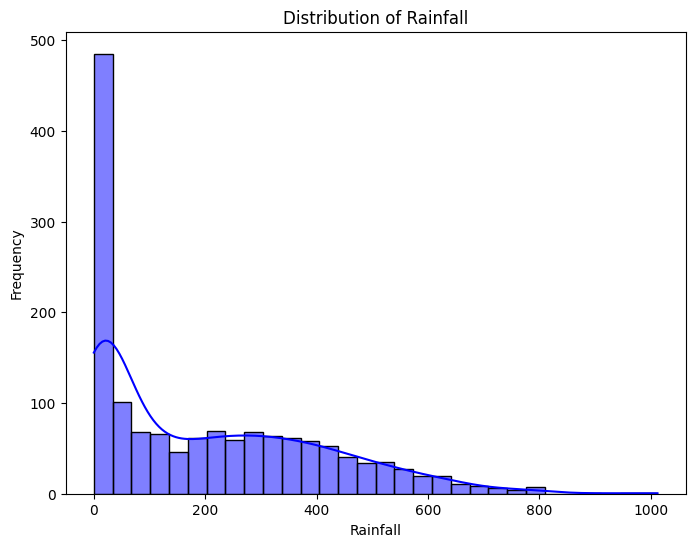

In [17]:
# Visualize the target variable (e.g., rainfall) distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['rain'], bins=30, kde=True, color='blue')
plt.title("Distribution of Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("Frequency")
plt.show()


<ipython-input-18-6a8ae882cb3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette='Blues_d')


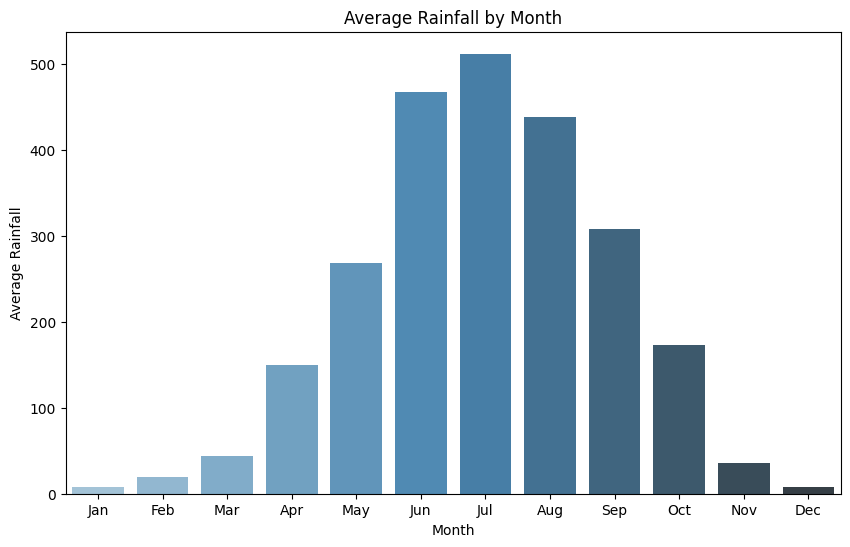

In [18]:
# Calculate the average rainfall for each month
monthly_rainfall = df.groupby('Month')['rain'].mean()

# Plotting the monthly rainfall distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette='Blues_d')
plt.title("Average Rainfall by Month")
plt.xlabel("Month")
plt.ylabel("Average Rainfall")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

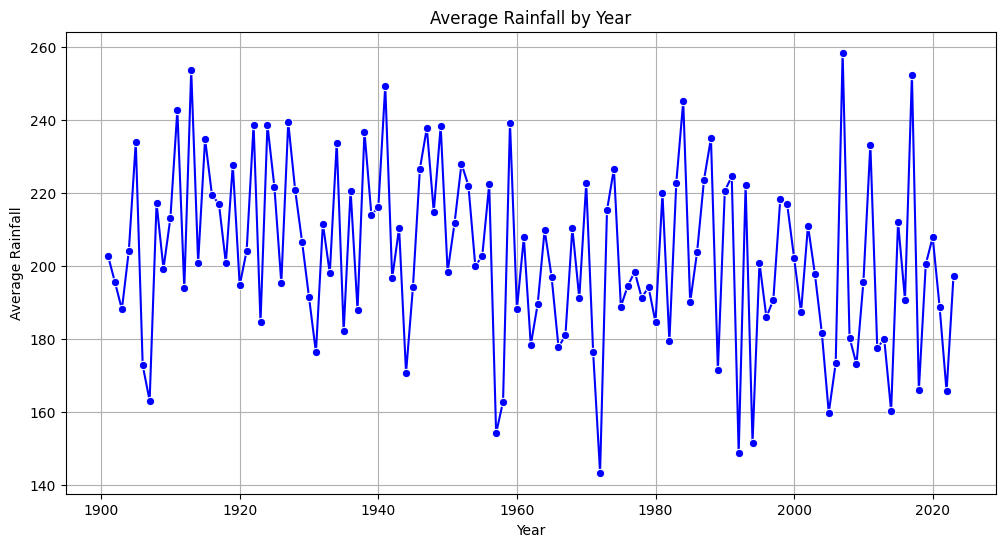

In [ ]:
# Calculate the average rainfall for each year
yearly_rainfall = df.groupby('Year')['rain'].mean()

# Plotting the yearly rainfall distribution
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_rainfall.index, y=yearly_rainfall.values, marker='o', color='blue')
plt.title("Average Rainfall by Year")
plt.xlabel("Year")
plt.ylabel("Average Rainfall")
plt.grid(True)
plt.show()

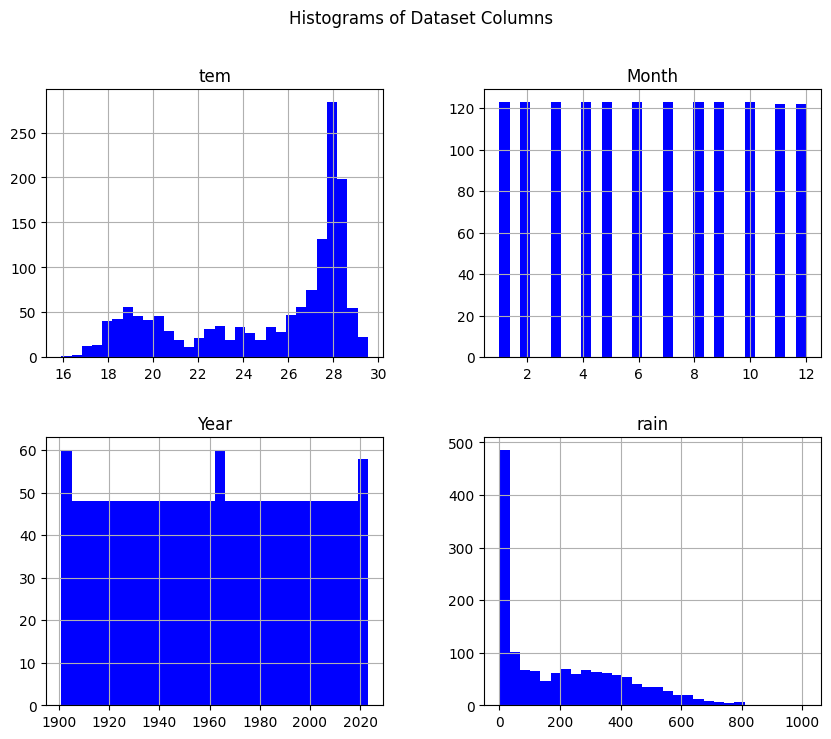

In [ ]:
# Histogram of all numerical columns
df.hist(bins=30, figsize=(10, 8), color='blue')
plt.suptitle("Histograms of Dataset Columns")
plt.show()


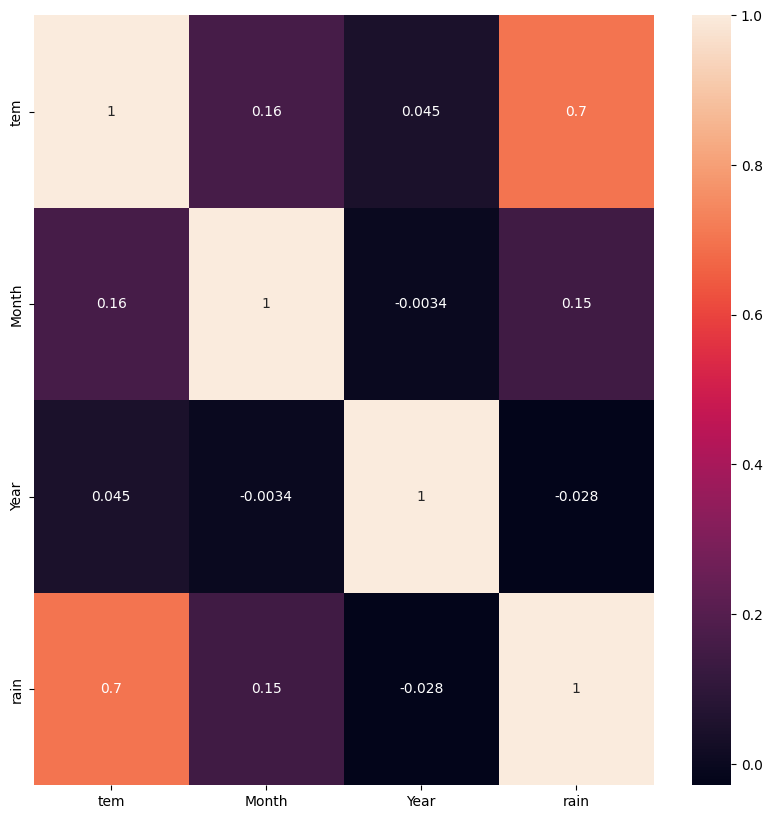

In [ ]:
# Correlation analysis

corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map

g = sb.heatmap(df[top_corr_features].corr(), annot=True)

# Split data into x & y

In [19]:
# Create a binary classification target
df['Rainfall_Level'] = np.where(df['rain'] > df['rain'].median(), 1, 0)

# Separate features and target variable
X = df.drop(columns=['rain', 'Rainfall_Level'])
y = df['Rainfall_Level']


In [20]:
X.head()

,tem,Month,Year
0,16.9760,1,1901
1,19.9026,2,1901
2,24.3158,3,1901
3,28.1834,4,1901
4,27.8892,5,1901


In [21]:
y.head()

,Rainfall_Level
0,0
1,0
2,0
3,0
4,1




#  Train Test Split data




In [22]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [23]:
X_train

array([[ 0.12691359, -1.01269523,  0.62277381],
       [ 0.18397043, -1.01269523, -1.12573779],
       [ 0.77145864,  0.1469185 ,  0.7919846 ],
       ...,
       [ 0.82273142,  0.72672536,  0.28435221],
       [ 1.02507437,  0.43682193,  1.6944422 ],
       [-0.52463181,  1.30653223,  0.9047918 ]])

In [ ]:
X_test

array([[-1.71498736e+00, -1.59250210e+00,  2.84352206e-01],
       [ 1.04898574e+00, -4.32888369e-01, -1.29494859e+00],
       [-3.88462984e-01, -1.30259867e+00,  1.24321340e+00],
       [ 6.49506730e-01,  4.36821930e-01, -1.57696659e+00],
       [ 8.37488902e-01, -4.32888369e-01, -1.21034319e+00],
       [ 1.01669110e-01, -1.01269523e+00, -5.61701793e-01],
       [-3.65515915e-01,  1.30653223e+00, -7.30912593e-01],
       [-1.63874038e+00, -1.59250210e+00, -1.15393959e+00],
       [ 2.08944630e-01, -1.01269523e+00, -1.21034319e+00],
       [-1.95672892e+00, -1.30259867e+00, -1.60516839e+00],
       [ 9.10924928e-01, -1.42984936e-01, -1.38674794e-01],
       [ 3.11382075e-01, -7.22791802e-01,  2.56150406e-01],
       [ 7.19050674e-01,  1.46918497e-01, -2.79683794e-01],
       [-1.21853063e+00, -1.30259867e+00, -8.71921593e-01],
       [-1.96591768e+00,  1.59643566e+00,  1.60983680e+00],
       [-1.90888874e+00, -1.59250210e+00,  5.94572005e-01],
       [ 5.67881114e-01, -7.22791802e-01

In [24]:
y_train

,Rainfall_Level
998,0
254,0
1074,1
643,1
1453,0
...,...
1130,0
1294,0
860,1
1459,1


In [ ]:
y_test

,Rainfall_Level
852,0
184,1
1261,0
67,1
220,1
...,...
560,1
946,0
522,1
874,0


# Define the Evaluation Function

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates a classification model's performance on the test data.

    Parameters:
    - model: Trained classification model
    - X_test: Test features
    - y_test: True labels for test data

    Returns:
    - Dictionary containing accuracy, precision, recall, F1-score
    - Prints classification report and displays confusion matrix
    """
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results in a dictionary
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Print the classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return metrics


# Different Classification Algorithms

### Random Forest Algorithm



Random Forest Classifier Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       143
           1       0.89      0.91      0.90       152

    accuracy                           0.90       295
   macro avg       0.90      0.90      0.90       295
weighted avg       0.90      0.90      0.90       295



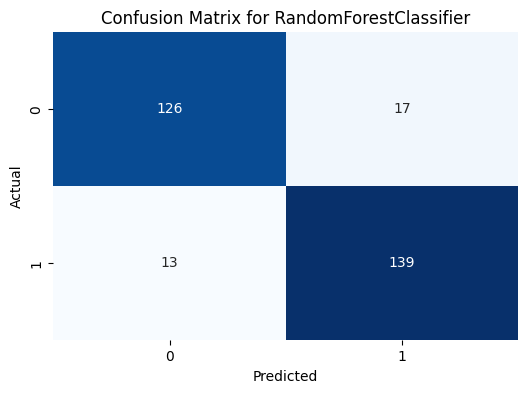

Evaluation Metrics: {'Accuracy': 0.8983050847457628, 'Precision': 0.8910256410256411, 'Recall': 0.9144736842105263, 'F1 Score': 0.9025974025974026}


In [ ]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Evaluate the model
print("\nRandom Forest Classifier Results:")
rf_metrics = evaluate_model(rf_classifier, X_test, y_test)
print("Evaluation Metrics:", rf_metrics)



### Decision Tree Algorithm


Decision Tree Classifier Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       143
           1       0.88      0.91      0.90       152

    accuracy                           0.89       295
   macro avg       0.89      0.89      0.89       295
weighted avg       0.89      0.89      0.89       295



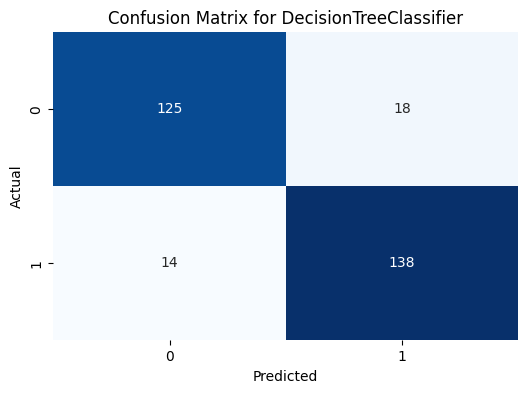

Evaluation Metrics: {'Accuracy': 0.8915254237288136, 'Precision': 0.8846153846153846, 'Recall': 0.9078947368421053, 'F1 Score': 0.8961038961038961}


In [ ]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Evaluate the model
print("\nDecision Tree Classifier Results:")
dt_metrics = evaluate_model(dt_classifier, X_test, y_test)
print("Evaluation Metrics:", dt_metrics)


### Logistic Regression


Logistic Regression Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       143
           1       0.87      0.96      0.91       152

    accuracy                           0.91       295
   macro avg       0.91      0.90      0.90       295
weighted avg       0.91      0.91      0.90       295



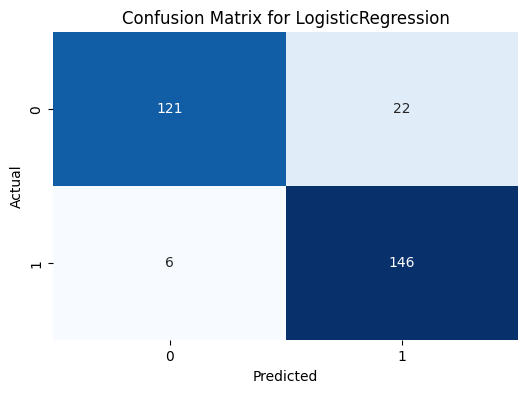

Evaluation Metrics: {'Accuracy': 0.9050847457627119, 'Precision': 0.8690476190476191, 'Recall': 0.9605263157894737, 'F1 Score': 0.9125}


In [ ]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Evaluate the model
print("\nLogistic Regression Results:")
log_reg_metrics = evaluate_model(log_reg, X_test, y_test)
print("Evaluation Metrics:", log_reg_metrics)


### Support Vector Machine (SVM)


Support Vector Machine Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       143
           1       0.86      0.97      0.91       152

    accuracy                           0.91       295
   macro avg       0.91      0.90      0.90       295
weighted avg       0.91      0.91      0.90       295



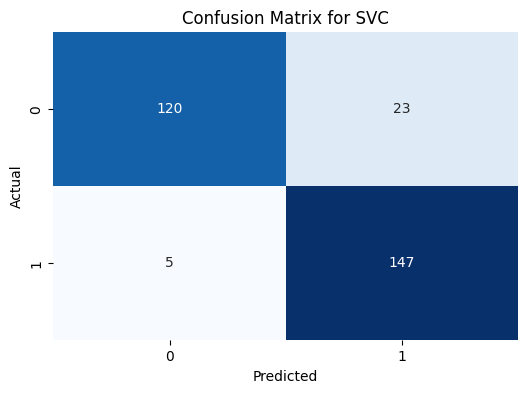

Evaluation Metrics: {'Accuracy': 0.9050847457627119, 'Precision': 0.8647058823529412, 'Recall': 0.9671052631578947, 'F1 Score': 0.9130434782608695}


In [ ]:
# Initialize Support Vector Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Evaluate the model
print("\nSupport Vector Machine Results:")
svm_metrics = evaluate_model(svm_classifier, X_test, y_test)
print("Evaluation Metrics:", svm_metrics)


# Hyperparameter Tuning to Improve Accuracy

### Logistic Regression with Hyperparameter Tuning


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}

Tuned Logistic Regression Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       143
           1       0.86      0.97      0.91       152

    accuracy                           0.91       295
   macro avg       0.91      0.90      0.90       295
weighted avg       0.91      0.91      0.90       295



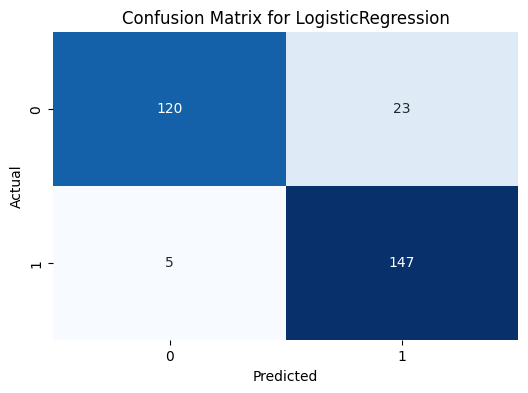

Evaluation Metrics: {'Accuracy': 0.9050847457627119, 'Precision': 0.8647058823529412, 'Recall': 0.9671052631578947, 'F1 Score': 0.9130434782608695}


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# Define parameter grid for Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV for Logistic Regression
log_reg_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=log_reg_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Train with GridSearchCV
log_reg_grid.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters for Logistic Regression:", log_reg_grid.best_params_)

# Evaluate the best estimator
print("\nTuned Logistic Regression Results:")
log_reg_best = log_reg_grid.best_estimator_
log_reg_best_metrics = evaluate_model(log_reg_best, X_test, y_test)
print("Evaluation Metrics:", log_reg_best_metrics)


### Decision Tree with Hyperparameter Tuning


Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Tuned Decision Tree Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       143
           1       0.89      0.91      0.90       152

    accuracy                           0.89       295
   macro avg       0.90      0.89      0.89       295
weighted avg       0.90      0.89      0.89       295



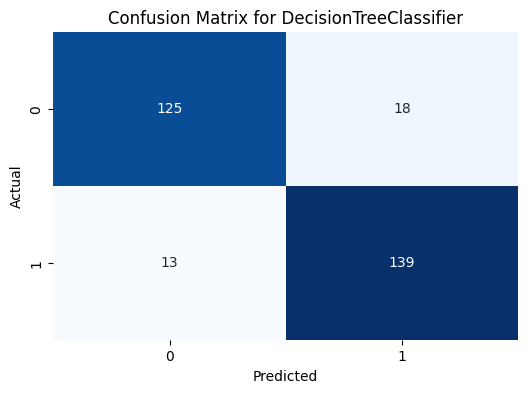

Evaluation Metrics: {'Accuracy': 0.8949152542372881, 'Precision': 0.8853503184713376, 'Recall': 0.9144736842105263, 'F1 Score': 0.8996763754045307}


In [ ]:
# Define parameter grid for Decision Tree
dt_params = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Decision Tree
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Train with GridSearchCV
dt_grid.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters for Decision Tree:", dt_grid.best_params_)

# Evaluate the best estimator
print("\nTuned Decision Tree Results:")
dt_best = dt_grid.best_estimator_
dt_best_metrics = evaluate_model(dt_best, X_test, y_test)
print("Evaluation Metrics:", dt_best_metrics)


### Random Forest with Hyperparameter Tuning


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

Tuned Random Forest Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       143
           1       0.89      0.93      0.91       152

    accuracy                           0.91       295
   macro avg       0.91      0.91      0.91       295
weighted avg       0.91      0.91      0.91       295



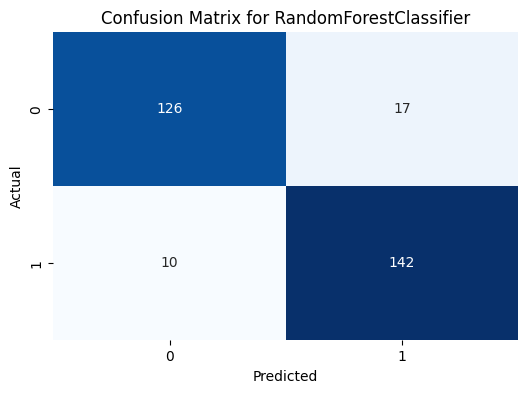

Evaluation Metrics: {'Accuracy': 0.9084745762711864, 'Precision': 0.8930817610062893, 'Recall': 0.9342105263157895, 'F1 Score': 0.9131832797427653}


In [ ]:
# Define parameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Train with GridSearchCV
rf_grid.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters for Random Forest:", rf_grid.best_params_)

# Evaluate the best estimator
print("\nTuned Random Forest Results:")
rf_best = rf_grid.best_estimator_
rf_best_metrics = evaluate_model(rf_best, X_test, y_test)
print("Evaluation Metrics:", rf_best_metrics)


### Support Vector Machine with Hyperparameter Tuning


Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Tuned SVM Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       143
           1       0.89      0.98      0.93       152

    accuracy                           0.93       295
   macro avg       0.93      0.92      0.92       295
weighted avg       0.93      0.93      0.93       295



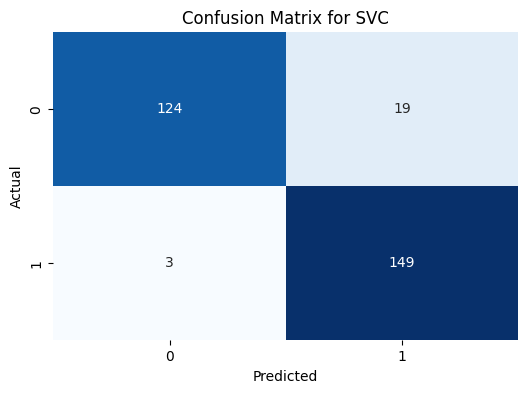

Evaluation Metrics: {'Accuracy': 0.9254237288135593, 'Precision': 0.8869047619047619, 'Recall': 0.9802631578947368, 'F1 Score': 0.93125}


In [ ]:
# Define parameter grid for SVM
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV for SVM
svm_grid = GridSearchCV(
    SVC(random_state=42),
    param_grid=svm_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Train with GridSearchCV
svm_grid.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters for SVM:", svm_grid.best_params_)

# Evaluate the best estimator
print("\nTuned SVM Results:")
svm_best = svm_grid.best_estimator_
svm_best_metrics = evaluate_model(svm_best, X_test, y_test)
print("Evaluation Metrics:", svm_best_metrics)


# Compare Model Performance


Model Performance Comparison:
                          Model  Accuracy  Precision    Recall  F1 Score
0           Logistic Regression  0.905085   0.869048  0.960526  0.912500
1                 Decision Tree  0.891525   0.884615  0.907895  0.896104
2                 Random Forest  0.898305   0.891026  0.914474  0.902597
3        Support Vector Machine  0.905085   0.864706  0.967105  0.913043
4     Tuned Logistic Regression  0.905085   0.864706  0.967105  0.913043
5           Tuned Decision Tree  0.894915   0.885350  0.914474  0.899676
6           Tuned Random Forest  0.908475   0.893082  0.934211  0.913183
7  Tuned Support Vector Machine  0.925424   0.886905  0.980263  0.931250


<ipython-input-48-db8d4a56d5f6>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=model_performance, palette='viridis')


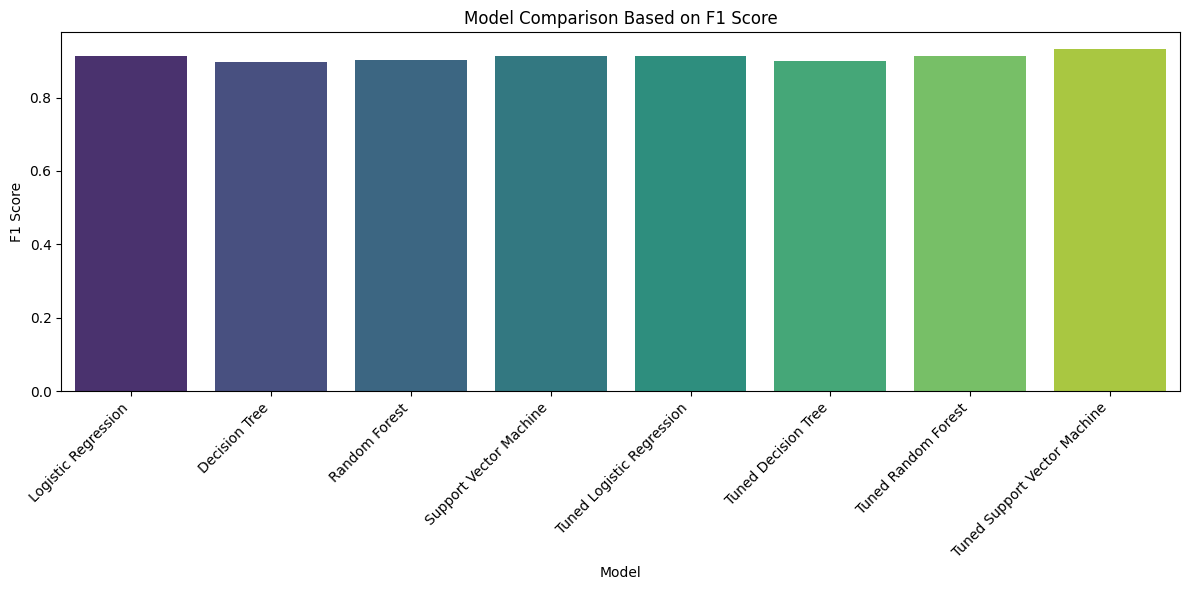

In [ ]:
# Compile all metrics into a DataFrame for comparison
model_performance = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'Support Vector Machine',
        'Tuned Logistic Regression',
        'Tuned Decision Tree',
        'Tuned Random Forest',
        'Tuned Support Vector Machine'
    ],
    'Accuracy': [
        log_reg_metrics['Accuracy'],
        dt_metrics['Accuracy'],
        rf_metrics['Accuracy'],
        svm_metrics['Accuracy'],
        log_reg_best_metrics['Accuracy'],
        dt_best_metrics['Accuracy'],
        rf_best_metrics['Accuracy'],
        svm_best_metrics['Accuracy']
    ],
    'Precision': [
        log_reg_metrics['Precision'],
        dt_metrics['Precision'],
        rf_metrics['Precision'],
        svm_metrics['Precision'],
        log_reg_best_metrics['Precision'],
        dt_best_metrics['Precision'],
        rf_best_metrics['Precision'],
        svm_best_metrics['Precision']
    ],
    'Recall': [
        log_reg_metrics['Recall'],
        dt_metrics['Recall'],
        rf_metrics['Recall'],
        svm_metrics['Recall'],
        log_reg_best_metrics['Recall'],
        dt_best_metrics['Recall'],
        rf_best_metrics['Recall'],
        svm_best_metrics['Recall']
    ],
    'F1 Score': [
        log_reg_metrics['F1 Score'],
        dt_metrics['F1 Score'],
        rf_metrics['F1 Score'],
        svm_metrics['F1 Score'],
        log_reg_best_metrics['F1 Score'],
        dt_best_metrics['F1 Score'],
        rf_best_metrics['F1 Score'],
        svm_best_metrics['F1 Score']
    ]
})

print("\nModel Performance Comparison:")
print(model_performance)

# Visualize the comparison using a bar plot for F1 Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score', data=model_performance, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Model Comparison Based on F1 Score")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()


# Make Predictions with the Best Model

In [ ]:
# Example input data (must match the feature order and preprocessing steps)
# For example: [Temperature, Month, Year, Season_Spring, Season_Summer, Season_Fall]
new_input = [[34.0, 7, 2027, 1, 0, 1]]

# Assuming the original features used for training were only the first three
# Select only the first three features for scaling
new_input_for_scaling = [[row[0], row[1], row[2]] for row in new_input]

# Preprocess the input data
new_input_scaled = scaler.transform(new_input_for_scaling)

# The model was trained with 3 features, so we use only the scaled features
prediction = rf_best.predict(new_input_scaled)

# Interpret the prediction
if prediction[0] == 1:
    print("The predicted rainfall level is HIGH.")
else:
    print("The predicted rainfall level is LOW.")

The predicted rainfall level is HIGH.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Example input data (must match the feature order and preprocessing steps)
# For example: [Temperature, Month, Year, Season_Spring, Season_Summer, Season_Fall]
new_input = [[25.0, 7, 2024, 0, 1, 0]]

# Assuming the original features used for training were only the first three
# Select only the first three features for scaling
new_input_for_scaling = [[row[0], row[1], row[2]] for row in new_input]

# Preprocess the input data
new_input_scaled = scaler.transform(new_input_for_scaling)

# The model was trained with 3 features, so we use only the scaled features
prediction = rf_best.predict(new_input_scaled)

# Interpret the prediction
if prediction[0] == 1:
    print("The predicted rainfall level is HIGH.")
else:
    print("The predicted rainfall level is LOW.")

The predicted rainfall level is LOW.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
